In [1]:
from preprocess import Session
import matplotlib.pyplot as plt
import gzip
import sys

In [2]:
sessions = []
with gzip.open('./input/train.gz', 'r') as f_train:
    for (idx, line) in enumerate(f_train):
        line = line.decode('utf-8')  # decode byte to string
        line = line.strip().split('\t')

        if line[1] == 'M':
            sessions.append(Session(line))
        elif line[2] == 'Q':
            sessions[-1].add_record(line)
        elif line[2] == 'C':
            sessions[-1].add_click(line)
        else:
            raise ValueError("cannot resolve this line: \n%s" % line)
        
        if idx+1 == 1e6: # for debug
            break
print("Total number of lines: %d" % (idx+1))
print("Number of unmatched urls: %d" % Session.notMatchCnt)
print("Number of sessions: %d" % len(sessions))

Total number of lines: 1000000
Number of unmatched urls: 4929
Number of sessions: 212556


In [3]:
# avg ctr (computed by session & by doc)
num_ses, num_click_ses = 0, 0
num_url, num_click_url = 0, 0
for s in sessions:
    num_ses += 1
    num_url += len(s.clicked)
    temp = sum(s.clicked)
    num_click_url += temp
    if temp > 0:
        num_click_ses += 1
print("avg ctr(by session): %f (%d/%d)" % (1.0*num_click_ses/num_ses, num_click_ses, num_ses))
print("avg ctr(by url): %f (%d/%d)" % (1.0*num_click_url/num_url, num_click_url, num_url))

avg ctr(by session): 0.699613 (148707/212556)
avg ctr(by url): 0.107722 (228969/2125560)


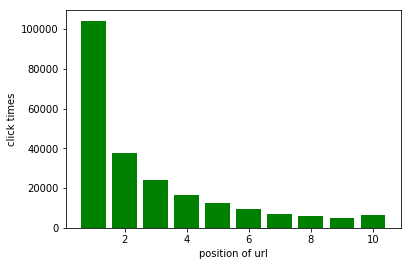

In [4]:
# position of click (1st-10th)
click_times = {}
for s in sessions:
    for idx, clk in enumerate(s.clicked):
        if clk > 0:
            click_times[idx+1] = click_times.get(idx+1, 0) + 1
# print(click_times)
plt.bar(list(click_times.keys()), click_times.values(),color='g')
plt.xlabel("position of url")
plt.ylabel("click times")
plt.show()

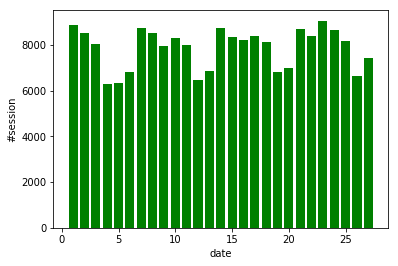

In [5]:
# number of session per day
date_flow = {}
for s in sessions:
    d = int(s.day)
    date_flow[d] = date_flow.get(d, 0) + 1
# print(date_flow)
plt.bar(list(date_flow.keys()), date_flow.values(),color='g')
plt.xlabel("date")
plt.ylabel("#session")
plt.show()

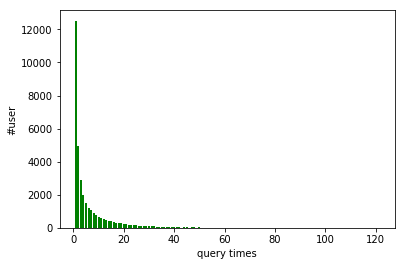

In [6]:
# session num(query times) for per user
query_times = {}
for s in sessions:
    query_times[s.u_id] = query_times.get(s.u_id, 0) + 1
query_times_user_num = {}
for k,v in query_times.items():
    query_times_user_num[v] = query_times_user_num.get(v, 0) + 1
plt.bar(list(query_times_user_num.keys()), query_times_user_num.values(),color='g')
plt.xlabel("query times")
plt.ylabel("#user")
plt.show()

In [7]:
# Total number of url, domain, query, terms
all_url, all_domain, all_query, all_terms = [set() for i in range(4)]

for s in sessions:
    for u,d in s.urls:
        all_url.add(u)
        all_domain.add(d)
    all_query.add(s.query)
    for t in s.terms:
        all_terms.add(t)

print("Number of session: %d" % len(sessions))
print("#url: %d\n#domain: %d\n#query: %d\n#terms: %d\nTotal: %d\n" % \
      (len(all_url), len(all_domain), len(all_query), len(all_terms), \
       len(all_url)+len(all_domain)+len(all_query)+len(all_terms)))

Number of session: 212556
#url: 1107414
#domain: 265683
#query: 137766
#terms: 106533
Total: 1617396

